In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Datasets/results.xlsx')
df = df[df['age'] != '65+']
df['QALYs'] = df['QALYs']/1000
df['HSCs'] = df['HSCs']/1000000
df

,age,gender,ethnicity,QALYs,HSCs
0,0-14,Male,non-Māori,0.036914,-1.012941
1,15-24,Male,non-Māori,0.035887,-1.013647
2,25-44,Male,non-Māori,0.040831,-0.638788
3,45-64,Male,non-Māori,0.016132,-0.304924
5,0-14,Female,non-Māori,0.029268,-0.824393
6,15-24,Female,non-Māori,0.028135,-0.735530
7,25-44,Female,non-Māori,0.036626,-0.426309
8,45-64,Female,non-Māori,0.013951,-0.244295
10,0-14,Male,Māori,0.100762,-2.415512
11,15-24,Male,Māori,0.120216,-2.397033


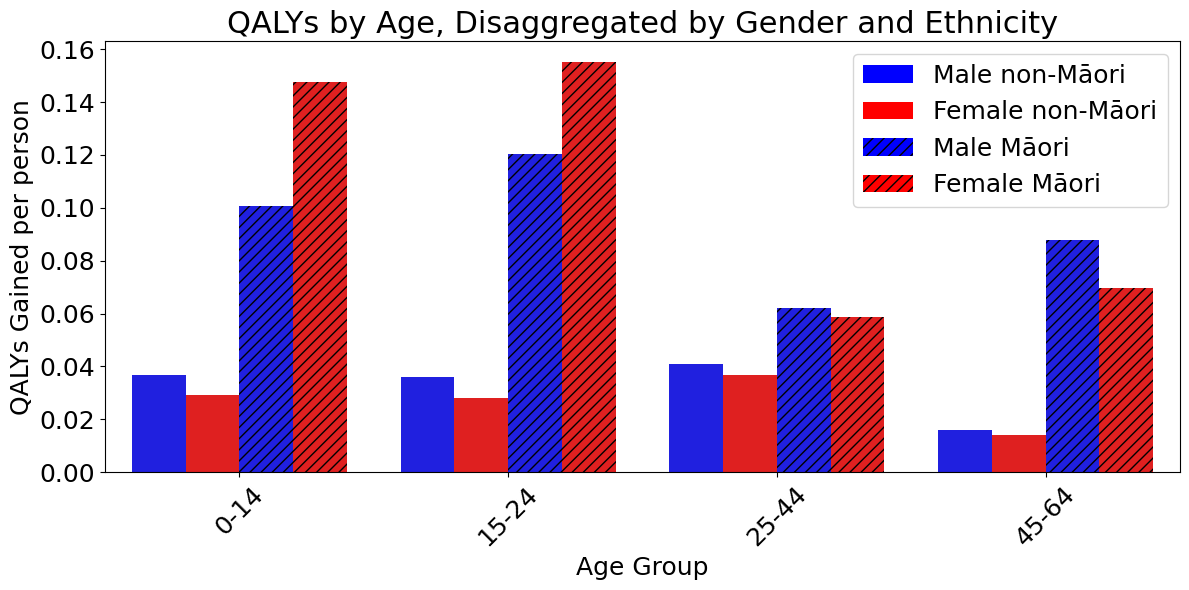

In [4]:
# Create a combined gender_ethnicity column
df['gender_ethnicity'] = df['gender'] + ' ' + df['ethnicity']

# Make HSCs positive
df['HSCs'] = df['HSCs'].abs()

palette = {
    'Male non-Māori': 'blue',
    'Female non-Māori': 'red',
    'Male Māori': 'blue',
    'Female Māori': 'red'
}
maori_groups = ['Male Māori', 'Female Māori']

# --- Plot Function ---
def plot_with_hatch(y_var, title, ylabel):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='age', y=y_var, hue='gender_ethnicity', data=df, palette=palette)

    # Apply hatching manually
    for bar, (index, row) in zip(ax.patches, df[['age', 'gender_ethnicity']].drop_duplicates().iterrows()):
        if row['gender_ethnicity'] in maori_groups:
            bar.set_hatch('///')  # Diagonal hatching

    # Create custom legend handles
    import matplotlib.patches as mpatches
    handles = []
    labels = []
    for group in df['gender_ethnicity'].unique():
        color = palette[group]
        hatch = '///' if group in maori_groups else ''
        patch = mpatches.Patch(facecolor=color, hatch=hatch, label=group)
        handles.append(patch)
        labels.append(group)

    plt.title(title, fontsize=22)
    plt.xlabel('Age Group', fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(handles=handles, prop={'size': 18})
    plt.tight_layout()
    plt.show()

# # --- Plot QALYs ---
plot_with_hatch(y_var='QALYs',
                title='QALYs by Age, Disaggregated by Gender and Ethnicity',
                ylabel='QALYs Gained per person')

# --- Plot HSCs ---
# plot_with_hatch(y_var='HSCs',
#                 title='Health System Savings by Age, Disaggregated by Gender and Ethnicity',
#                 ylabel='Health System Savings (in million NZD)')

In [11]:
# Load the data with the second row as header (header=1 means index 1)
df_vape = pd.read_excel('./Datasets/tobacco_data_v2.xlsx', header=1)

# Filter the DataFrame correctly using combined conditions
df_compare = df_vape[
    (df_vape['gender'] == 'Female') &
    (df_vape['ethnicity'] == 'Māori') &
    (df_vape['age'] == '15-24')
][['Intervention_descriptor', 'hs_costs_pc']]

# Scale QALYs
# df_compare['qalys_pc'] = df_compare['qalys_pc'] / 1000
df_compare['hs_costs_pc'] = df_compare['hs_costs_pc'] / -1e6

new_row = ['Legalising Vape and Nicotine Patches', 2.397033]
new_row_df = pd.DataFrame([new_row], columns=['Intervention_descriptor', 'hs_costs_pc'])
df_compare = pd.concat([df_compare, new_row_df], ignore_index=True)

# Sort by descending qalys_pc
df_compare = df_compare.sort_values(by='hs_costs_pc', ascending=False).head(5)

# Rename intervention descriptors
df_compare['Intervention_descriptor'] = df_compare['Intervention_descriptor'].replace({
    'Sinking lid on tobacco supply (reducing tobacco commercial sales each year until sales are zero in 2025)': 'Sinking Lid',
    'Tax increased by 20% per year until 2025, tobacco retail outlets reduced by 95% and tobacco-free generation strategy implemented': 'Combined Strategy (Tax 20%)',
    'Combined tobacco endgame strategy (tobacco-free generation + tobacco tax increases + substantive outlet reduction strategy)': 'Combined Strategy (Tax 10%)',
    'Tobacco-free generation (law change prohibiting tobacco sale and supply to individuals born from 1993 onwards)': 'Tobacco-free generation',
    'Ongoing tobacco tax increases (10% annually from 2011 to 2025)': '10% Tobacco Tax Increase'
})

df_compare

,Intervention_descriptor,hs_costs_pc
2,Sinking Lid,2.822967
6,Legalising Vape and Nicotine Patches,2.397033
0,Combined Strategy (Tax 10%),1.993620
5,Tobacco-free generation,1.610845
1,10% Tobacco Tax Increase,0.701754


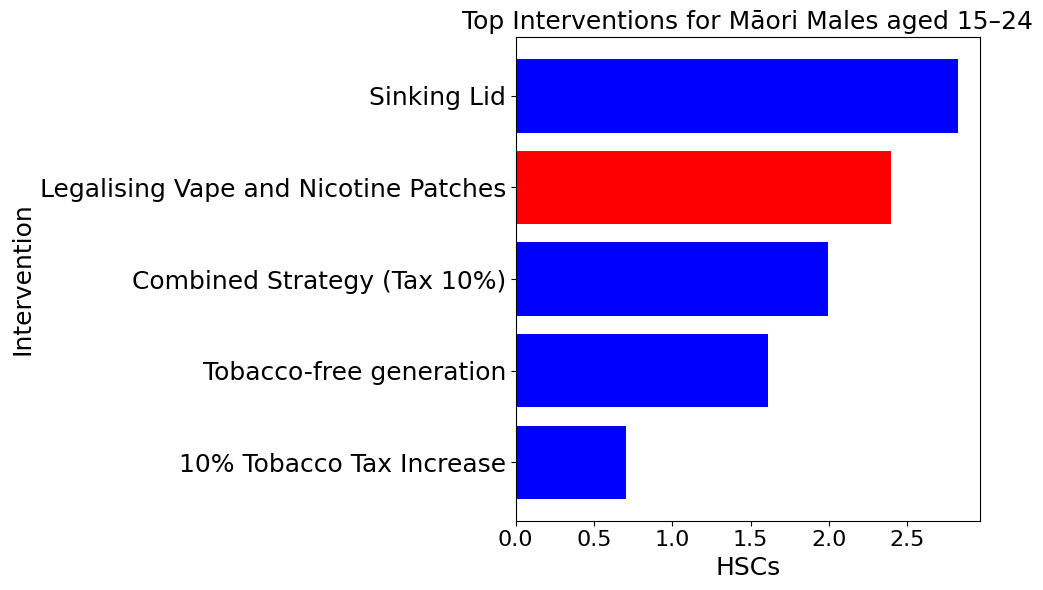

In [13]:
# Set colors: red for the vaping intervention, blue for the rest
colors = ['red' if desc == 'Legalising Vape and Nicotine Patches' else 'blue'
          for desc in df_compare['Intervention_descriptor']]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df_compare['Intervention_descriptor'], df_compare['hs_costs_pc'], color=colors)

plt.xlabel('HSCs', fontsize=18)
plt.ylabel('Intervention', fontsize=18)
plt.title('Top Interventions for Māori Males aged 15–24', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()